### Task 1: FDM Mobile Analysis

1. Brief 
Which Networks, Handsets, SIMO plans and specific activity (e.g. Price Drops & Promotions etc.) have driven the High Sales Performance of the Market during the Weeks of October to December 2019?

2. Data Available

- Sales Performance Data: Weekly Sales volumes for the Total Market, split by Price Bracket. This will show the performance of the Market across the period in question, allowing you to highlight the key weeks for the analysis

- Pricing & Offer Data: FDM Track the Mobile market on a Daily and Weekly basis, covering all Tariffs from the Networks for SIMO and Handset. There are over 40+ KPIs within this data including basic elements such as "Headline Monthly Cost", "Data Allowance" and "Promotion." This should allow you to see the Offers available during the key periods of the quarter from the Networks

3. Output and what we are looking for:

•	Chart driven PPT slides in a storyboard / presentation style (~5 slides)
•	Please overlay key market events that can be driving the trends (this may be using your own research)
•	Clear visualisations linking the data sources in an easily-to-follow format
•	Analytical approach of using the KPIs of the datasets to answer the brief  
•	Key take-outs with concise statements that answers the brief 


## 1. Data Observation & Data Cleaning

In [28]:
import pandas as pd

df = pd.read_csv("Task 1_Pricing & Offer Data.csv")

# Convert serial dates to datetime
start_date = pd.Timestamp("1899-12-30")
df["Date"] = pd.to_timedelta(df["Date"], unit="D") + start_date
# Extract the month from 'Date' and create a new column 'Month'
df["Month"] = df["Date"].dt.month

In [29]:
# Display the first few rows of the DataFrame
df.head()

,Network,Device/SIMO,Segment,Date,Tariff Name,Retailer,Change WoW,Tenure (months),Upfront Cost,Upfront Cost Value of Life Cost %,...,In-contract Price 2 Start Month,In-contract Price 2 End Month,In-contract Price 2 Period,In-contract Price 3,In-contract Price 3 Start Month,In-contract Price 3 End Month,In-contract Price 3 Period,Out Of Contract Price,Unnamed: 51,Month
0,Virgin Mobile,iPhone 7 (32GB),PAYM,2019-11-27,Freestyle 100GB for ?22.00,Virgin Mobile,NaN,36,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,1,11
1,Three,Galaxy A10,PAYM,2019-10-02,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
2,Three,Galaxy A10,PAYM,2019-10-02,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
3,Three,Galaxy A10,PAYM,2019-10-09,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
4,Three,Galaxy A10,PAYM,2019-10-16,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10


In [30]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19428 entries, 0 to 19427
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Network                            19428 non-null  object        
 1   Device/SIMO                        19428 non-null  object        
 2   Segment                            19428 non-null  object        
 3   Date                               19428 non-null  datetime64[ns]
 4   Tariff Name                        19428 non-null  object        
 5   Retailer                           19428 non-null  object        
 6   Change WoW                         843 non-null    object        
 7   Tenure (months)                    19428 non-null  int64         
 8   Upfront Cost                       19428 non-null  float64       
 9   Upfront Cost Value of Life Cost %  19428 non-null  float64       
 10  Headline Mins                     

In [31]:
# Convert the 'Date' column to datetime format
df["Date"] = pd.to_datetime(
    df["Date"], format="%d/%m/%Y"
)  # Adjust the format as necessary

df["On Promotion"].fillna(
    "No", inplace=True
)  # Fill NaN with 'No' or '0' depending on the context
df["On Promotion"] = df["On Promotion"].replace({"Yes": 1, "No": 0}).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7468\2812836163.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["On Promotion"].fillna(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7468\2812836163.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["On Promotion"] = df["On Promotion"].replace({"Y

In [32]:
df.head()

,Network,Device/SIMO,Segment,Date,Tariff Name,Retailer,Change WoW,Tenure (months),Upfront Cost,Upfront Cost Value of Life Cost %,...,In-contract Price 2 Start Month,In-contract Price 2 End Month,In-contract Price 2 Period,In-contract Price 3,In-contract Price 3 Start Month,In-contract Price 3 End Month,In-contract Price 3 Period,Out Of Contract Price,Unnamed: 51,Month
0,Virgin Mobile,iPhone 7 (32GB),PAYM,2019-11-27,Freestyle 100GB for ?22.00,Virgin Mobile,NaN,36,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,1,11
1,Three,Galaxy A10,PAYM,2019-10-02,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
2,Three,Galaxy A10,PAYM,2019-10-02,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
3,Three,Galaxy A10,PAYM,2019-10-09,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10
4,Three,Galaxy A10,PAYM,2019-10-16,Advanced All-You-Can-Eat for ?25.00,Three,NaN,24,19.0,0.030695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1,10


In [33]:
# Get basic statistical details about the DataFrame
df.describe()

,Date,Tenure (months),Upfront Cost,Upfront Cost Value of Life Cost %,Headline MLR,MLR Promotion Months,MLR Promo Value,Handset_Contract_Standard_Cost,Standard MLR,Headline Life Cost,...,In-contract Price 2 Start Month,In-contract Price 2 End Month,In-contract Price 2 Period,In-contract Price 3,In-contract Price 3 Start Month,In-contract Price 3 End Month,In-contract Price 3 Period,Out Of Contract Price,Unnamed: 51,Month
count,19428,19428.000000,19428.000000,19428.000000,19428.000000,3679.000000,19428.000000,19428.0,19428.000000,19428.000000,...,22.000000,22.000000,22.000000,0.0,0.0,0.0,0.0,19428.000000,19428.000000,19428.000000
mean,2019-11-14 01:17:05.077208064,24.376004,53.965535,0.045109,40.777049,5.128024,5.258341,0.0,40.981916,1099.046203,...,4.954545,22.363636,18.409091,NaN,NaN,NaN,NaN,40.981916,6.384136,10.100782
min,2019-10-02 00:00:00,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,4.000000,4.000000,...,4.000000,12.000000,9.000000,NaN,NaN,NaN,NaN,4.000000,1.000000,1.000000
25%,2019-10-23 00:00:00,24.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.0,27.000000,696.000000,...,4.000000,24.000000,18.000000,NaN,NaN,NaN,NaN,27.000000,4.000000,10.000000
50%,2019-11-13 00:00:00,24.000000,29.000000,0.020085,40.230000,0.000000,0.000000,0.0,40.500000,1151.700000,...,4.000000,24.000000,19.500000,NaN,NaN,NaN,NaN,40.500000,5.000000,11.000000
75%,2019-12-04 00:00:00,30.000000,79.990000,0.061734,52.990000,0.000000,0.000000,0.0,53.000000,1488.000000,...,7.000000,24.000000,21.000000,NaN,NaN,NaN,NaN,53.000000,8.000000,11.000000
max,2020-01-08 00:00:00,36.000000,799.000000,0.624707,110.000000,36.000000,720.000000,0.0,110.000000,2736.000000,...,7.000000,24.000000,21.000000,NaN,NaN,NaN,NaN,110.000000,21.000000,12.000000
std,NaN,8.473858,80.222932,0.069911,18.119212,10.925830,34.995040,0.0,18.197731,574.660887,...,1.430194,3.786511,3.620827,NaN,NaN,NaN,NaN,18.197731,3.215003,2.697557


In [34]:
# List all columns in the DataFrame
df.columns

Index(['Network', 'Device/SIMO', 'Segment', 'Date', 'Tariff Name', 'Retailer',
       'Change WoW', 'Tenure (months)', 'Upfront Cost',
       'Upfront Cost Value of Life Cost %', 'Headline Mins', 'Standard Mins',
       'Headline Texts', 'Standard Texts', 'Headline Data', 'Standard Data',
       'Headline MLR', 'MLR Promotion Months', 'MLR Promo Value',
       'Handset_Contract_Standard_Cost', 'Standard MLR', 'Headline Life Cost',
       'Monthly Cost Per GB', 'AverageMonthlyCost', 'Standard Life Cost',
       '3G/4G/5G', 'On Promotion', 'Promo Details', 'Promotion Type',
       'Data Promo Value (%)', 'Headline MLR Promo Value (%)',
       'Life Cost Promo Value (%)', 'Premium Content',
       'Premium Content Detail', 'Existing Customer Offer',
       'Existing Customer Offer Detail', 'WoW Change Detail', 'Manufacturer',
       'In-contract Price 1', 'In-contract Price 1 Start Month',
       'In-contract Price 1 End Month', 'In-contract Price 1 Period',
       'In-contract Price 2', 

Networks, Handsets/SIMO plans, Price Drops, Promotions 

## 2. Data Interprtation


### 2.1 Insights from Sales performance
We already got some insights from the sales performance data; check below:

Key Observations & Driver Keywords:

- November Sales Spike: Handset, cost range: 30-39.9, Black Friday Promo, 03 Nov-24 Nov
- Early January Sales Recovery: SIMO, cost range: 0-9.9, Boxing Day / New Year promo; 15 Dec - 05 Jan
- Higher Sensitivity in Handset Market

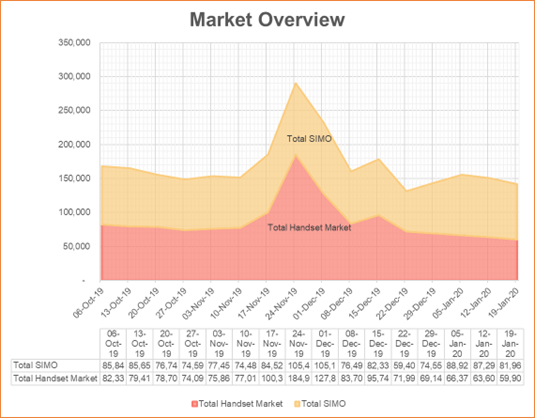


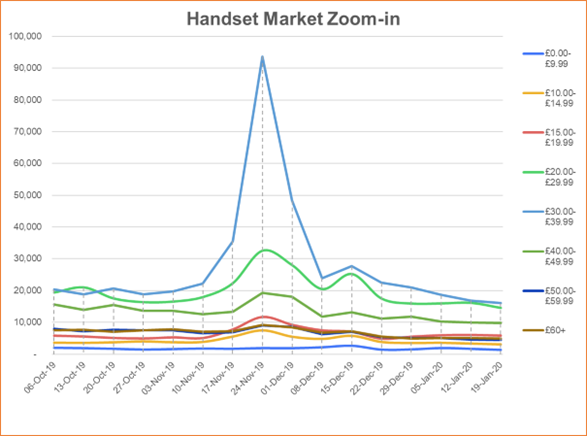
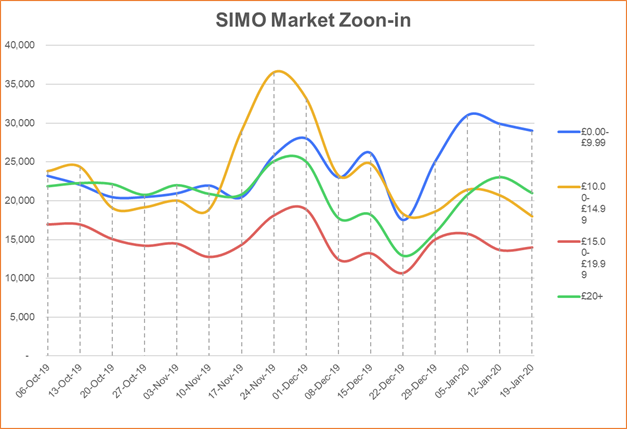

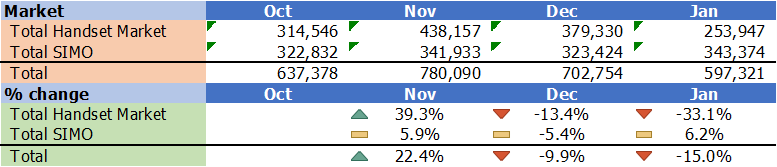

### 2.2 Insights Combination

#### 2.2.1. Propotion of Promoted Products

Let's look into the change in promoted products over time. Note that "on promotion" is indicating the % of promoted products in this discussion.

In [35]:
# Compare the % of promotion product at different date
df_overall_promo = df.groupby(["Date"])[["On Promotion"]].mean()
df_overall_promo = df_overall_promo.reset_index()
df_overall_promo

,Date,On Promotion
0,2019-10-02,0.464516
1,2019-10-09,0.415042
2,2019-10-16,0.502714
3,2019-10-23,0.451289
4,2019-10-30,0.385999
5,2019-11-06,0.286667
6,2019-11-13,0.282034
7,2019-11-20,0.322418
8,2019-11-27,0.485981
9,2019-12-04,0.324399


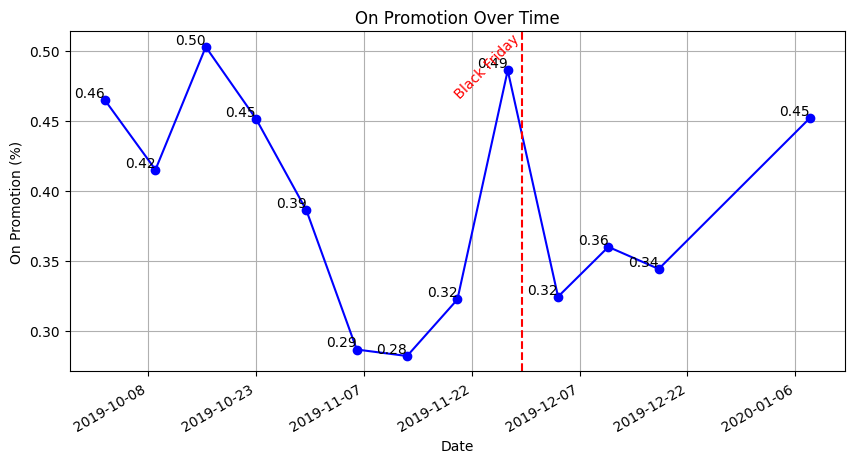

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(10, 5))
(line,) = plt.plot(
    df_overall_promo["Date"],
    df_overall_promo["On Promotion"],
    marker="o",
    linestyle="-",
    color="b",
)

# Date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.title("On Promotion Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion (%)")
plt.grid(True)

# Adding data labels
for i, j in zip(df_overall_promo["Date"], df_overall_promo["On Promotion"]):
    plt.text(
        i, j, f"{j:.2f}", ha="right", va="bottom"
    )  # Format the label text and position

# Highlight Black Friday 2019 even though it's not in the dataset
black_friday = pd.Timestamp("2019-11-29")
plt.axvline(x=black_friday, color="r", linestyle="--", label="Black Friday")

# Adding a label to the vertical line
plt.text(
    black_friday,
    plt.ylim()[1],
    " Black Friday",
    color="red",
    ha="right",
    verticalalignment="top",
    rotation=45,
)


plt.show()

Interpretation

- There are more products on promotion during the sales peak compared to other times.
- Pricing Strategy: Companies decreased promotion activities one month before Black Friday and largely increased the % of promoted products from 17th Nov.

#### 2.2.2. Networks 



In [37]:
# Assuming 'df' is your DataFrame
df_network_promo = df.groupby(["Network", "Date"])["On Promotion"].mean().reset_index()
# Pivot the DataFrame
df_pivoted = df_network_promo.pivot(
    index="Date", columns="Network", values="On Promotion"
)
df_pivoted

Network,BT Mobile,EE,GiffGaff,O2,Plusnet Mobile,SMARTY,Sky Mobile,Tesco Mobile,Three,VOXI,Virgin Mobile,Vodafone,iD Mobile
Date,,,,,,,,,,,,,
2019-10-02,0.600000,0.409091,0.196262,0.554348,0.761905,0.2,0.381818,0.728223,0.063830,0.00,0.381944,0.361582,0.141414
2019-10-09,0.761905,0.424837,0.175258,0.334375,0.750000,0.2,0.563636,0.760000,0.069767,0.00,0.237762,0.310345,0.151163
2019-10-16,0.761905,0.487654,0.206186,0.351682,0.736842,0.2,0.636364,0.978182,0.155556,0.00,0.375000,0.450549,0.191919
2019-10-23,0.761905,0.461538,0.170940,0.290735,0.642857,0.0,0.490909,0.973568,0.133333,0.00,0.375000,0.390805,0.270000
2019-10-30,0.761905,0.438596,0.000000,0.237237,0.642857,0.0,0.381818,0.798762,0.000000,0.00,0.225806,0.348485,0.137255
2019-11-06,0.761905,0.437126,0.000000,0.231707,0.666667,0.4,0.381818,0.227437,0.000000,0.25,0.161074,0.340314,0.481818
2019-11-13,0.764706,0.419162,0.000000,0.208723,0.642857,0.4,0.381818,0.228261,0.000000,0.75,0.156463,0.342105,0.518519
2019-11-20,0.760000,0.454545,0.000000,0.217391,0.642857,0.4,0.454545,0.197531,0.111111,0.75,0.484076,0.358974,0.554545
2019-11-27,0.827586,0.606250,0.512821,0.428571,0.722222,0.5,0.563636,0.419753,0.133333,0.75,0.527027,0.407143,0.556522


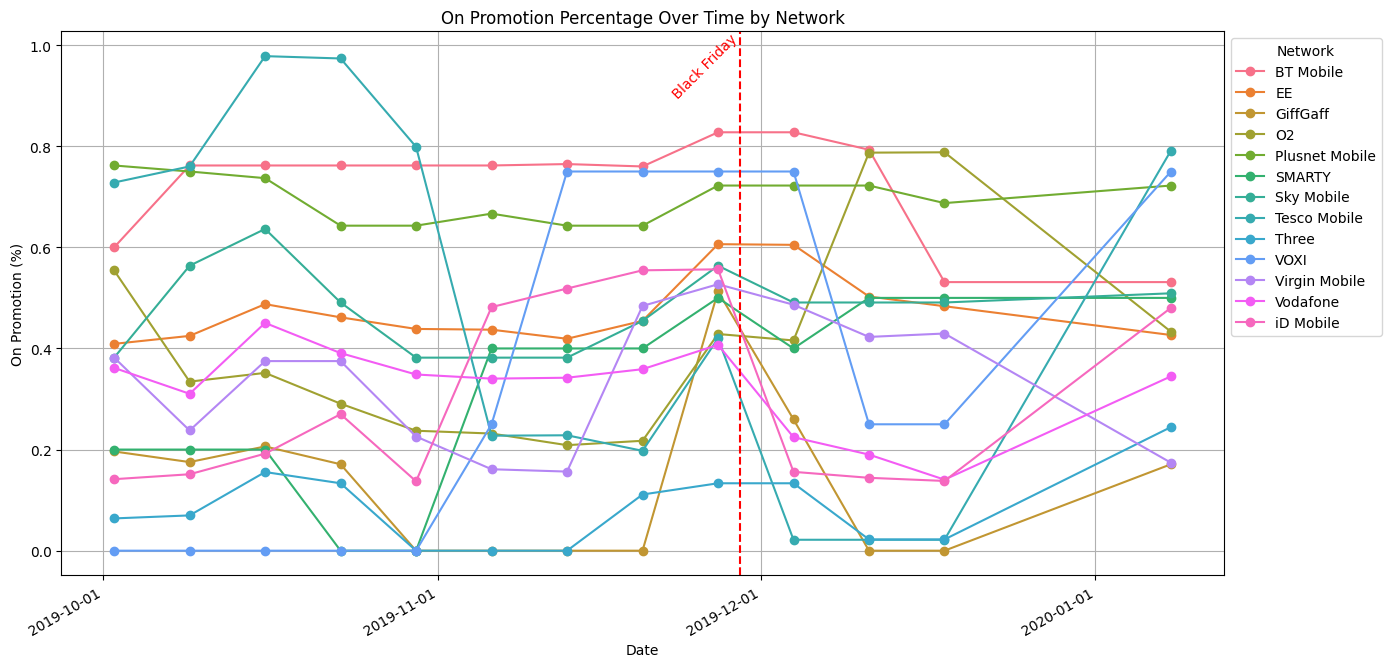

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming df_pivoted is already defined with 'Date' as the index and networks as columns

# Set the figure size once for the plot
plt.figure(figsize=(15, 8))

# Creating a palette with seaborn, which offers distinct and visually appealing colors
palette = sns.color_palette(
    "husl", len(df_pivoted.columns)
)  # Adjust the number if more than 14 networks

# Apply the custom color palette
for idx, network in enumerate(df_pivoted.columns):
    plt.plot(
        df_pivoted.index,
        df_pivoted[network],
        marker="o",
        linestyle="-",
        color=palette[idx],
        label=network,
    )

# Formatting and labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap
plt.title("On Promotion Percentage Over Time by Network")
plt.xlabel("Date")
plt.ylabel("On Promotion (%)")
plt.legend(
    title="Network", loc="upper left", bbox_to_anchor=(1, 1)
)  # Move legend outside plot
plt.grid(True)

# Highlight Black Friday, even though it's not in the dataset
black_friday = pd.Timestamp("2019-11-29")
plt.axvline(x=black_friday, color="r", linestyle="--", label="Black Friday")
plt.text(
    black_friday,
    plt.ylim()[1],
    " Black Friday",
    color="red",
    ha="right",
    verticalalignment="top",
    rotation=45,
)

# Show the plot
plt.show()

nterpretation

- During the Black Friday sales season, all networks increased their promotion levels, but the magnitude of changes varied.
- Different Promotion Strategies: BT kept a high level of % promoted products and only increased slightly during the sales season. Conversely, Giffgaff maintained a low level and saw a significant increase during the winter sale.

#### 2.2.3. PAYM Zoom-in: Price 

In [40]:
import pandas as pd

# Compare PAYM prices over time
df_PAYM_price = df[df["Segment"] == "PAYM"]

# Define bins for 'AverageMonthlyCost'
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99]
labels = [
    "0-9.99",
    "10-19.99",
    "20-29.99",
    "30-39.99",
    "40-49.99",
    "50-59.99",
    "60-69.99",
    "70-79.99",
    "80-89.99",
    "90-99.99",
]
df_PAYM_price["Cost Range"] = pd.cut(
    df_PAYM_price["AverageMonthlyCost"], bins=bins, labels=labels, right=True
)

# Group by 'Cost Range' and 'Date', and calculate the mean of 'Monthly Cost Per GB'
df_grouped = (
    df_PAYM_price.groupby(["Cost Range", "Date"])[
        ["Data Promo Value (%)", "Headline MLR Promo Value (%)", "Monthly Cost Per GB"]
    ]
    .mean()
    .reset_index()
)
df_grouped

C:\Users\DELL\AppData\Local\Temp\ipykernel_7468\1252276829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PAYM_price['Cost Range'] = pd.cut(df_PAYM_price['AverageMonthlyCost'], bins=bins, labels=labels, right=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7468\1252276829.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_PAYM_price.groupby(['Cost Range', 'Date'])[["Data Promo Value (%)",'Headline MLR Promo Value (%)','Monthly Cost Per GB']].mean().reset_index()


,Cost Range,Date,Data Promo Value (%),Headline MLR Promo Value (%),Monthly Cost Per GB
0,0-9.99,2019-10-02,0.0,0.0,19.980000
1,0-9.99,2019-10-09,0.0,0.0,19.980000
2,0-9.99,2019-10-16,0.0,0.0,19.980000
3,0-9.99,2019-10-23,0.0,0.0,19.980000
4,0-9.99,2019-10-30,NaN,NaN,NaN
...,...,...,...,...,...
125,90-99.99,2019-11-27,0.0,0.0,0.921235
126,90-99.99,2019-12-04,0.0,0.0,0.920098
127,90-99.99,2019-12-11,0.0,0.0,0.919812
128,90-99.99,2019-12-18,0.0,0.0,0.919812


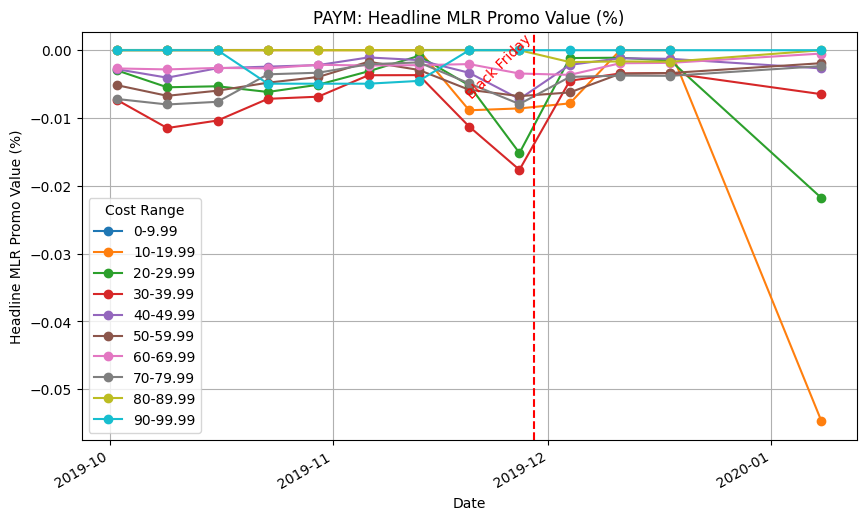

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot setup
plt.figure(figsize=(10, 6))

# Plot each cost range group
for label in labels:
    subset = df_grouped[df_grouped["Cost Range"] == label]
    plt.plot(
        subset["Date"],
        subset["Headline MLR Promo Value (%)"],
        marker="o",
        linestyle="-",
        label=label,
    )

# Formatting the plot
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap
plt.title("PAYM: Headline MLR Promo Value (%)")
plt.xlabel("Date")
plt.ylabel("Headline MLR Promo Value (%)")
plt.legend(title="Cost Range")
plt.grid(True)

# Highlight Black Friday 2019 even though it's not in the dataset
black_friday = pd.Timestamp("2019-11-29")
plt.axvline(x=black_friday, color="r", linestyle="--", label="Black Friday")

# Adding a label to the vertical line
plt.text(
    black_friday,
    plt.ylim()[1],
    " Black Friday",
    color="red",
    ha="right",
    verticalalignment="top",
    rotation=45,
)


# Show plot
plt.show()

Intrepretation 

- During the Black friday Sale season, PAYM products price range in "20-29.9" or "30-39.9" has the highest headline MLP promo %. This explains the peak in figure:"HANDSET MARKET ZOOM-IN" "20-29.9" and "30-39.9" increase in sale.

#### 2.2.4. Devices

In [ ]:
# Assuming 'df' is your DataFrame
df_device_promo = (
    df.groupby(["Device/SIMO", "Date"])["On Promotion"].mean().reset_index()
)
# Pivot the DataFrame
df_device_promo = df_device_promo.pivot(
    index="Date", columns="Device/SIMO", values="On Promotion"
)
df_device_promo

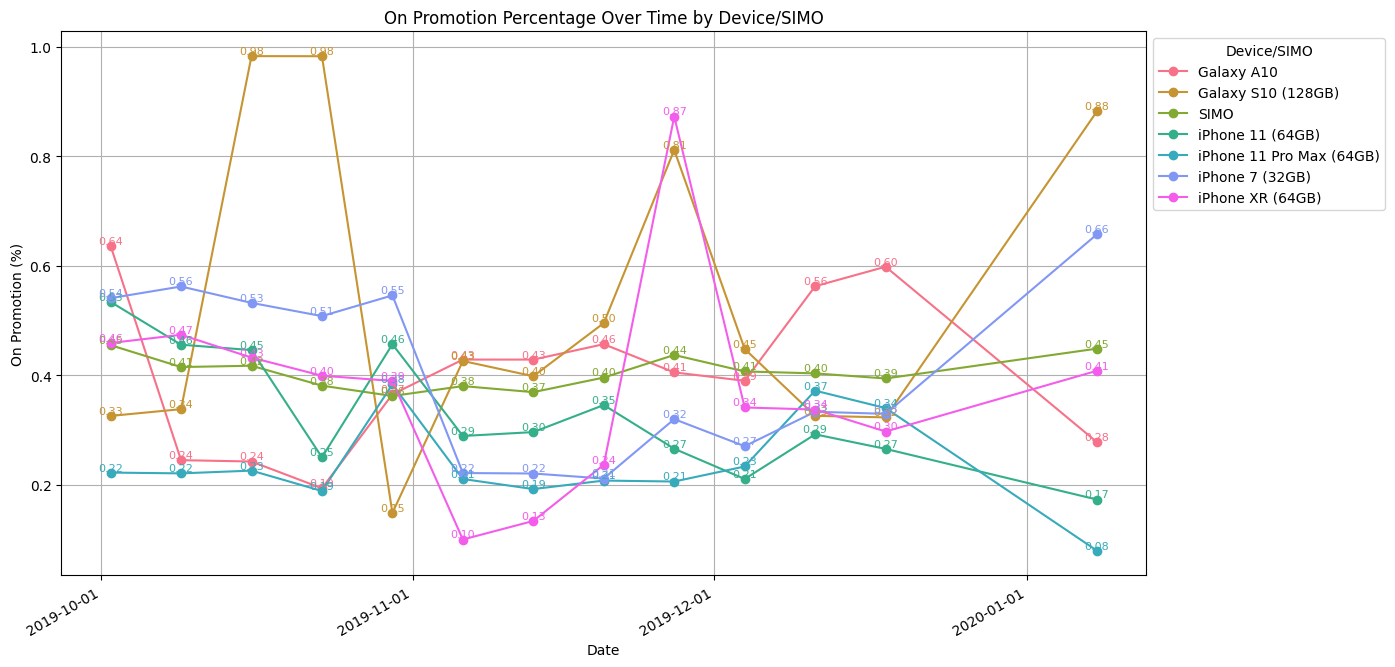

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming 'df' is your DataFrame already loaded with relevant data
df_device_promo = (
    df.groupby(["Device/SIMO", "Date"])["On Promotion"].mean().reset_index()
)

# Pivot the DataFrame to have devices/SIMO plans as columns and dates as rows
df_device_promo_pivot = df_device_promo.pivot(
    index="Date", columns="Device/SIMO", values="On Promotion"
)

# Creating a seaborn color palette that can handle many unique devices/SIMO plans
palette = sns.color_palette("husl", df_device_promo_pivot.columns.size)

# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Plot each device/SIMO with a unique color
for idx, device in enumerate(df_device_promo_pivot.columns):
    (line,) = plt.plot(
        df_device_promo_pivot.index,
        df_device_promo_pivot[device],
        marker="o",
        linestyle="-",
        color=palette[idx],
        label=device,
    )
    # Add data labels to each point
    for date, value in zip(df_device_promo_pivot.index, df_device_promo_pivot[device]):
        plt.text(
            date,
            value,
            f"{value:.2f}",
            color=palette[idx],
            ha="center",
            va="bottom",
            fontsize=8,
        )

# Formatting the plot with date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap

# Adding plot title, labels, and grid
plt.title("On Promotion Percentage Over Time by Device/SIMO")
plt.xlabel("Date")
plt.ylabel("On Promotion (%)")
plt.legend(
    title="Device/SIMO", loc="upper left", bbox_to_anchor=(1, 1)
)  # Move legend outside plot to avoid covering data
plt.grid(True)

# Show the plot
plt.show()

During the Black friday Sale season, among all devices/SIMO, 87% "Galaxy S10" and 81% "iPhone XR (64GB)" deals had promotions, potientially pushed the sales performance.

## 3. Reporting


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Title Slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Task 1: FDM Mobile Analysis"
subtitle.text = (
    "An Analysis of Market Performance and Key Drivers from October to December 2019"
)

# Slide 2: Brief & Data Overview
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Brief & Data Overview"
content = slide.placeholders[1]
content.text = """
Objective: Identify key drivers of high sales performance.
Data Sources:
- Sales Performance Data: Weekly volumes by price bracket.
- Pricing & Offer Data: Daily/weekly tariffs with 40+ KPIs.
"""

# Slide 3: Sales Performance Insights
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Sales Performance Insights"
content = slide.placeholders[1]
content.text = """
Key Insights:
- November Sales Spike: Driven by handset sales in the 30-39.9 cost range, likely influenced by Black Friday promotions.
- Early January Sales Recovery: SIMO plans in the 0-9.9 cost range, influenced by Boxing Day / New Year promotions.
"""

# Add chart (Replace this with actual chart embedding code)
left = Inches(1)
top = Inches(2)
height = Inches(3.5)
slide.shapes.add_picture("weekly_sales_volumes_chart.png", left, top, height=height)

# Slide 4: Impact of Promotions
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Impact of Promotions"
content = slide.placeholders[1]
content.text = """
Proportion of Promoted Products:
- Increase in promotions during sales peaks.
- Significant rise in promoted products from mid-November leading to Black Friday.
Network Promotion Strategies:
- Varying strategies with BT maintaining high promotions and Giffgaff significantly increasing during sales periods.
"""

# Add chart (Replace this with actual chart embedding code)
left = Inches(1)
top = Inches(2)
height = Inches(3.5)
slide.shapes.add_picture("output1.png", left, top, height=height)

# Slide 5: Key Takeaways & Recommendations
slide = prs.slides.add_slide(prs.slide_layouts[1])
title = slide.shapes.title
title.text = "Key Takeaways & Recommendations"
content = slide.placeholders[1]
content.text = """
Summary:
- High sales driven by targeted promotions and strategic pricing.
- Black Friday and holiday promotions were critical.
Recommendations:
- Maintain robust promotions during key sales periods.
- Tailor strategies to specific devices and customer segments for maximum impact.
"""

# Save the presentation
prs.save("FDM_Mobile_Analysis_Presentation.pptx")